# House of Price -Análise Exploratória dos Dados
## Contexto

### 📌 Objetivos do EDA:
* Entender a estrutura e qualidade dos dados
* Identificar variáveis importantes
* Detectar outliers, valores ausentes e distribuições
* Formular hipóteses



### 1. Configurações Iniciais

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap


color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF", 
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

sns.set_palette(sns.color_palette(color_palette21))
sns.color_palette(color_palette21)

[(0.0, 0.2980392156862745, 0.2980392156862745),
 (0.0, 0.4, 0.4),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.09803921568627451, 0.5686274509803921, 0.5686274509803921),
 (0.1607843137254902, 0.6392156862745098, 0.6392156862745098),
 (0.25098039215686274, 0.7098039215686275, 0.7098039215686275),
 (0.3333333333333333, 0.7803921568627451, 0.7803921568627451),
 (0.4, 0.8509803921568627, 0.8509803921568627),
 (0.5019607843137255, 0.9254901960784314, 0.9254901960784314),
 (0.6, 1.0, 1.0),
 (1.0, 0.8352941176470589, 0.5019607843137255),
 (1.0, 0.7686274509803922, 0.3764705882352941),
 (1.0, 0.6980392156862745, 0.25098039215686274),
 (1.0, 0.6274509803921569, 0.12549019607843137),
 (1.0, 0.5568627450980392, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (1.0, 0.39215686274509803, 0.0),
 (1.0, 0.2980392156862745, 0.0),
 (1.0, 0.2, 0.0),
 (1.0, 0.10196078431372549, 0.0),
 (1.0, 0.0, 0.0)]

---
## 2. Dataload & Pré-visualização dos Dados 🗂️

In [2]:
# Carregando os dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/HousePrices/data/raw/train.csv")
df=dfo.drop(columns='Id')
NC=df.shape[1]
inital_describe(df,True)

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 1460 linhas
   • 80 colunas
   • Total de células: 116800

🔧 TIPOS DE DADOS:
   • object: 43 colunas
   • int64: 34 colunas
   • float64: 3 colunas

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 7829
   • Percentual: 6.70%

📊 COLUNAS COM VALORES NULOS:
   • LotFrontage: 259 nulos (17.74%)
   • Alley: 1369 nulos (93.77%)
   • MasVnrType: 872 nulos (59.73%)
   • MasVnrArea: 8 nulos (0.55%)
   • BsmtQual: 37 nulos (2.53%)
   • BsmtCond: 37 nulos (2.53%)
   • BsmtExposure: 38 nulos (2.60%)
   • BsmtFinType1: 37 nulos (2.53%)
   • BsmtFinType2: 38 nulos (2.60%)
   • Electrical: 1 nulos (0.07%)
   • FireplaceQu: 690 nulos (47.26%)
   • GarageType: 81 nulos (5.55%)
   • GarageYrBlt: 81 nulos (5.55%)
   • GarageFinish: 81 nulos (5.55%)
   • GarageQual: 81 nulos (5.55%)
   • GarageCond: 81 nulos (5.55%)
   • PoolQC: 1453 nulos (99.52%)
   • Fence: 

📌 **Nota:** 
* O dataset possui 80 colunas, numérica (34 int+3 float) e categóricas(43);
* Possui 19 colunas com valores nulos. **Como o conjunto tem muitas features, iremos excluir features com mais de 40% de nulos**. `Alley`,`MasVnrType`,`FireplaceQu`,`PoolQC`,`Fence`,`MiscFeature`
  

In [3]:
# remoção das colunas com mais de 40% dos valores nulos
N=len(df)
df = df.dropna(axis=1, thresh=(1-0.4)*N).copy()
print(NC-df.shape[1],'colunas removidas!')

6 colunas removidas!


In [4]:
missing = df.isnull().sum()/df.shape[0]*100
missing = missing[missing > 0]
missing.sort_values(inplace=True)
#missing.plot.bar()

missing_df = missing.reset_index()
missing_df.columns = ['Coluna', 'Percentual']

# # 3. Criar o gráfico
# fig = px.bar(
#     missing_df, 
#     x='Coluna', 
#     y='Percentual',
#     color='Coluna', # Atribui uma cor por coluna
#     color_discrete_sequence=color_palette21, 
#     title='Percentual de Valores Faltantes por Coluna',
#     labels={'Percentual': 'Dados Faltantes (%)', 'Coluna': 'Variável'}
# )

# # # 4. Ajustes estéticos (opcional)
# fig.update_layout(
#     showlegend=False, # Remove a legenda já que o eixo X já identifica as colunas
#     template="plotly_white")

# fig.show()

## agrupamento das features
| Grupo | Natureza               |
| ----- | ---------------------- |
| 1     | Terreno & localização  |
| 2     | Estrutura e construção |
| 3     | Área e layout          |
| 4     | Amenidades e conforto  |
| 5   | Contexto de venda      |


In [5]:
#agrupando as variaveis

#FG- feature_group
FG={ "target": ["SalePrice"],
 "land": [
        "MSZoning",
        "Neighborhood",
        "LotFrontage",
        "LotArea",
        "Street",
        "LotShape",
        "LandContour",
        "Utilities",
        "LotConfig",
        "LandSlope",
        "Condition1",
        "Condition2",
        "PavedDrive"],
"structure": [
        "MSSubClass",
        "BldgType",
        "HouseStyle",
        "OverallQual",
        "OverallCond",
        "YearBuilt",
        "YearRemodAdd",
        "Foundation",
        "RoofStyle",
        "RoofMatl",
        "Exterior1st",
        "Exterior2nd",
        "MasVnrArea"],
 "area": [
        "TotalBsmtSF",
        "BsmtFinSF1",
        "BsmtFinSF2",
        "BsmtUnfSF",
        "1stFlrSF",
        "2ndFlrSF",
        "LowQualFinSF",
        "GrLivArea",
        "BsmtFullBath",
        "BsmtHalfBath",
        "FullBath",
        "HalfBath",
        "BedroomAbvGr",
        "KitchenAbvGr",
        "TotRmsAbvGrd",
        "Functional",
        "KitchenQual"],
  "comfort": [
        "Heating",
        "HeatingQC",
        "CentralAir",
        "Electrical",
        "BsmtQual",
        "BsmtCond",
        "BsmtExposure",
        "BsmtFinType1",
        "BsmtFinType2",
        "Fireplaces",
        "GarageType",
        "GarageYrBlt",
        "GarageFinish",
        "GarageCars",
        "GarageArea",
        "GarageQual",
        "GarageCond",
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
        "PoolArea",
        "MiscVal"
    ],
 "sale_context": [
        "MoSold",
        "YrSold",
        "SaleType",
        "SaleCondition"]
}


### 2.1 Variaveis numéricas 

In [6]:
#out1=mult_plt2(df[FG['land']],ncols=4,max_bins=10,figsize=(16, 18),suptitle='Terreno e localização')
#out2=mult_plt2(df[FG['structure']],ncols=4,max_bins=10,figsize=(16, 18),suptitle='Estrutura & construção')
#out3=mult_plt2(df[FG['area']],ncols=4,max_bins=10,figsize=(16, 18),suptitle='Área e layout')
#out4=mult_plt2(df[FG['comfort']],ncols=4,max_bins=10,figsize=(16, 18),suptitle='conforto')
#out5=mult_plt2(df[FG['sale_context']],ncols=4,max_bins=10,figsize=(16,5),suptitle='conforto')

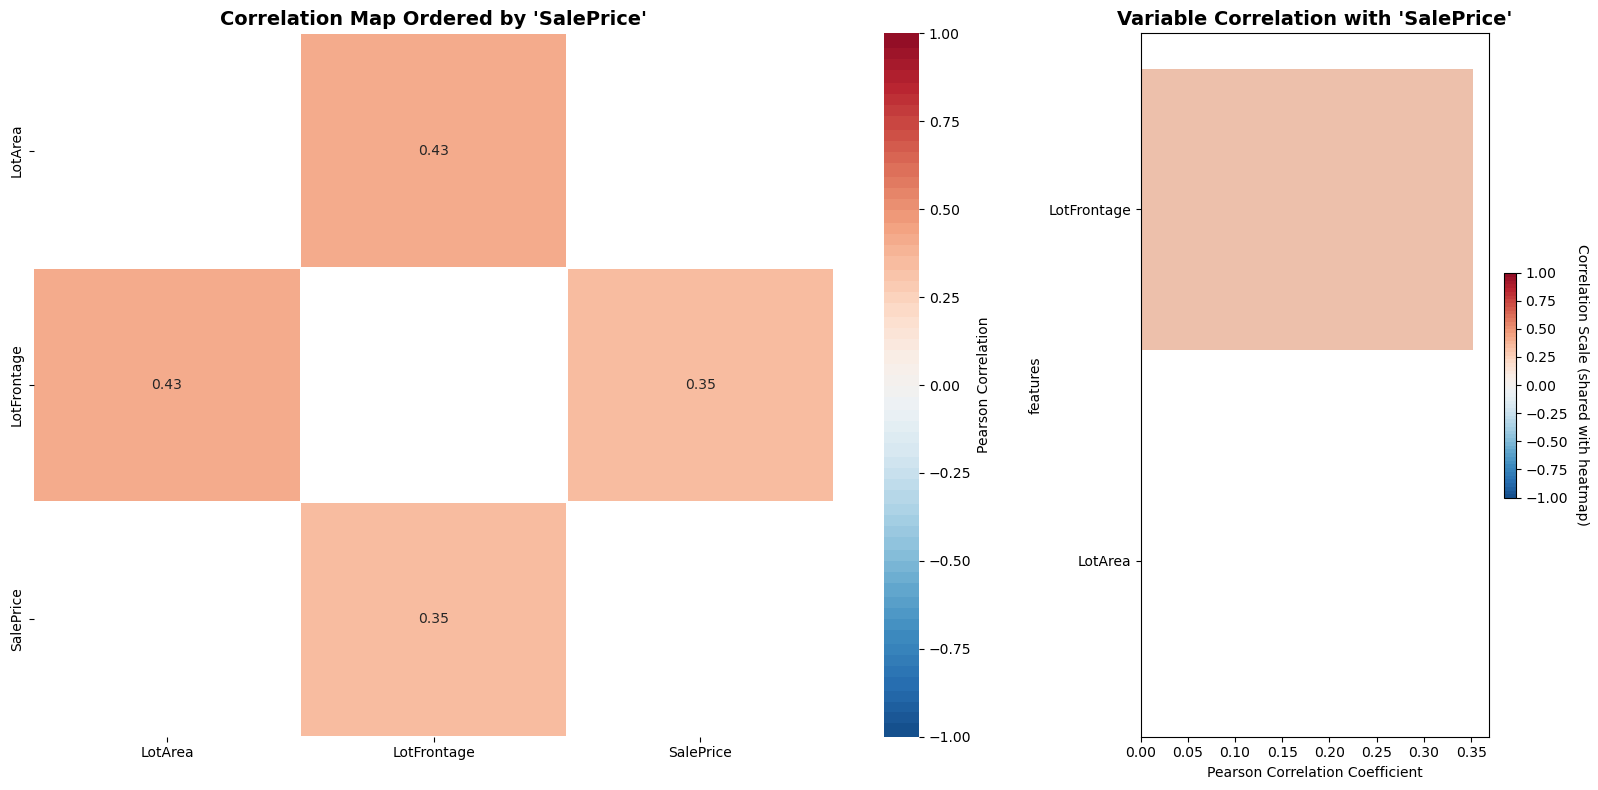

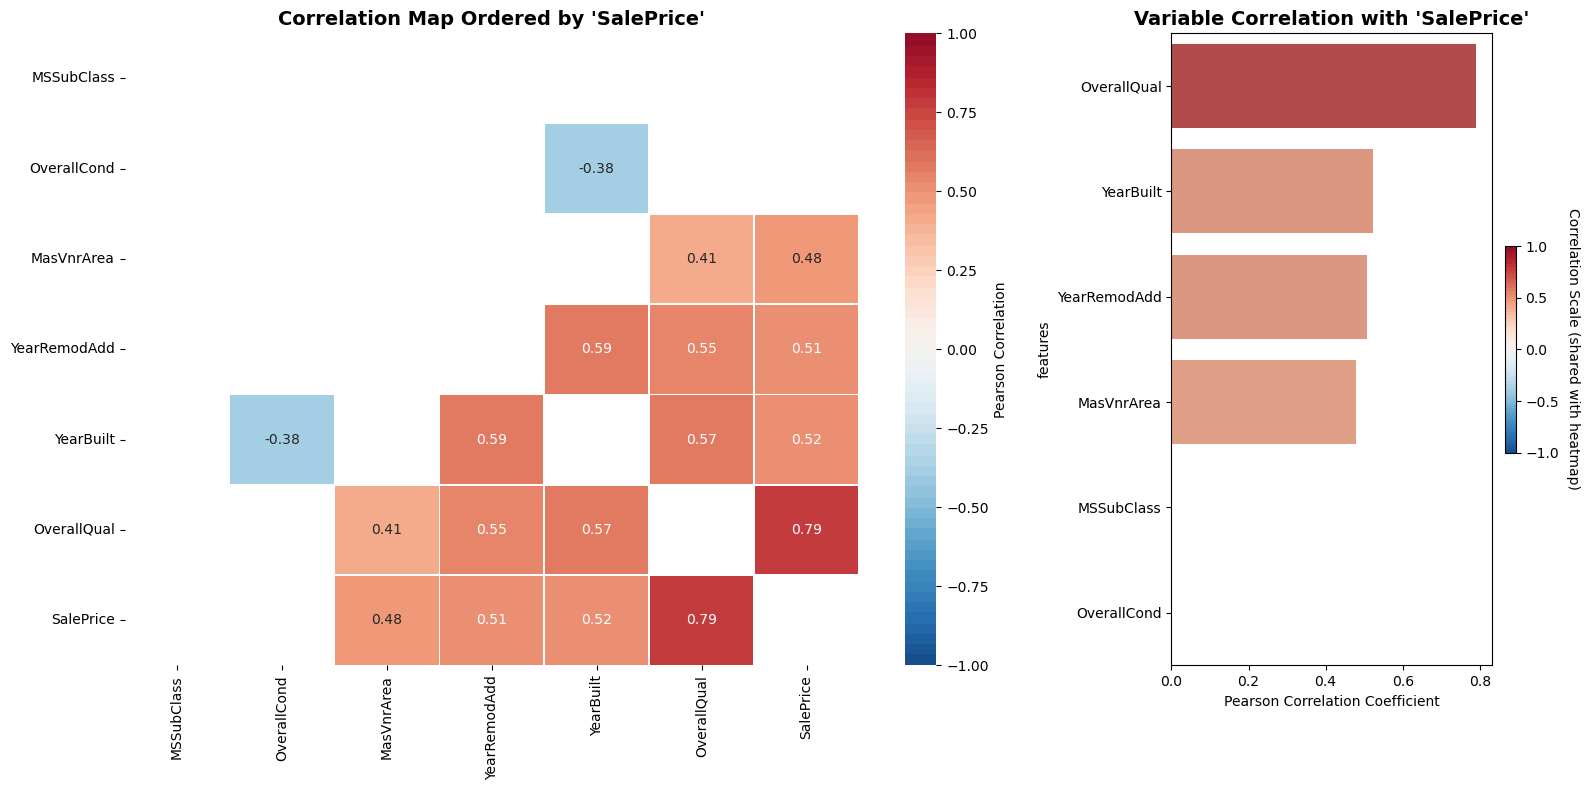

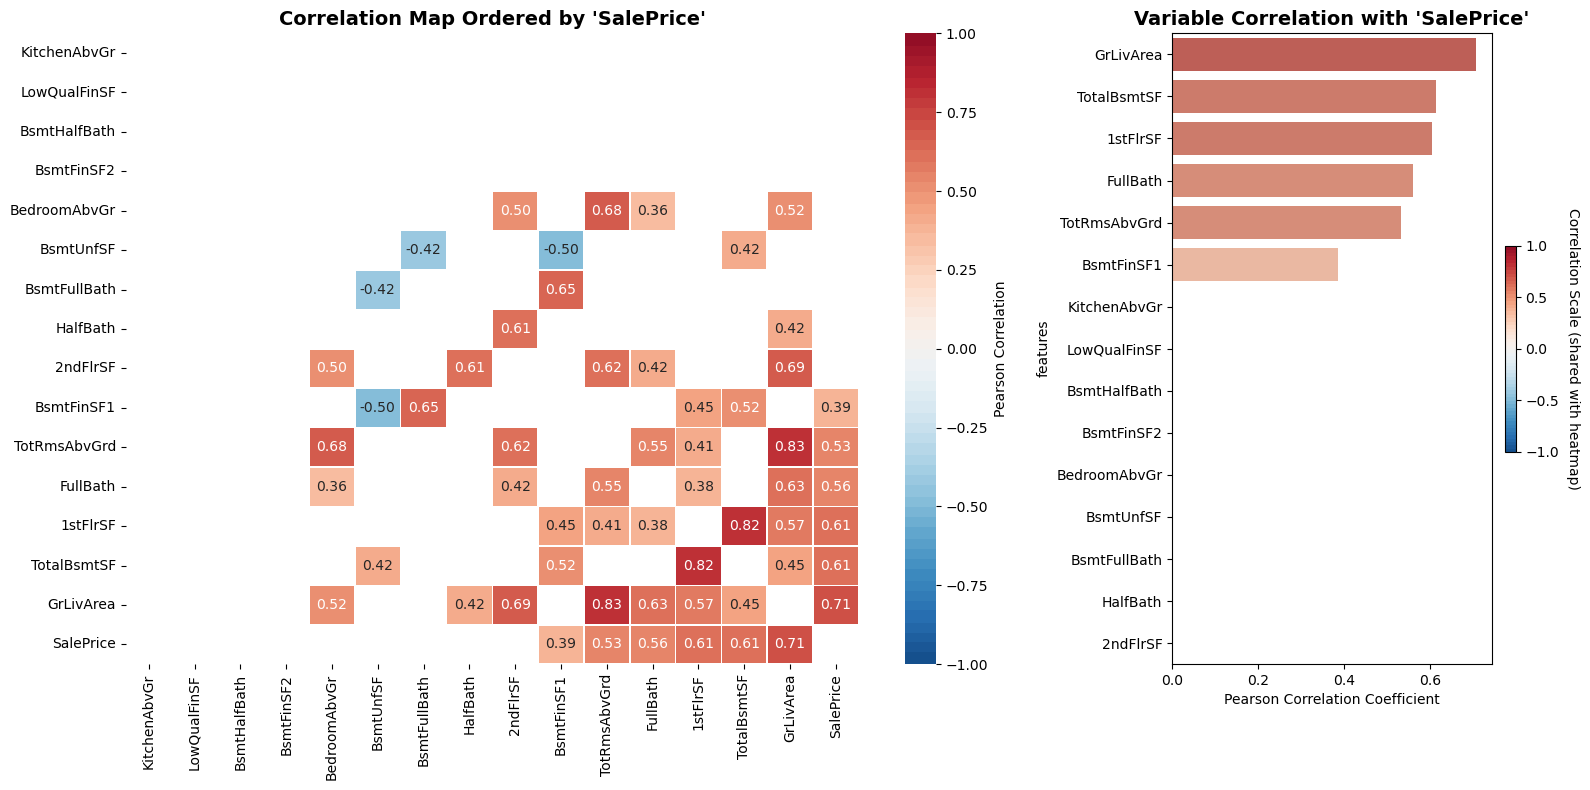

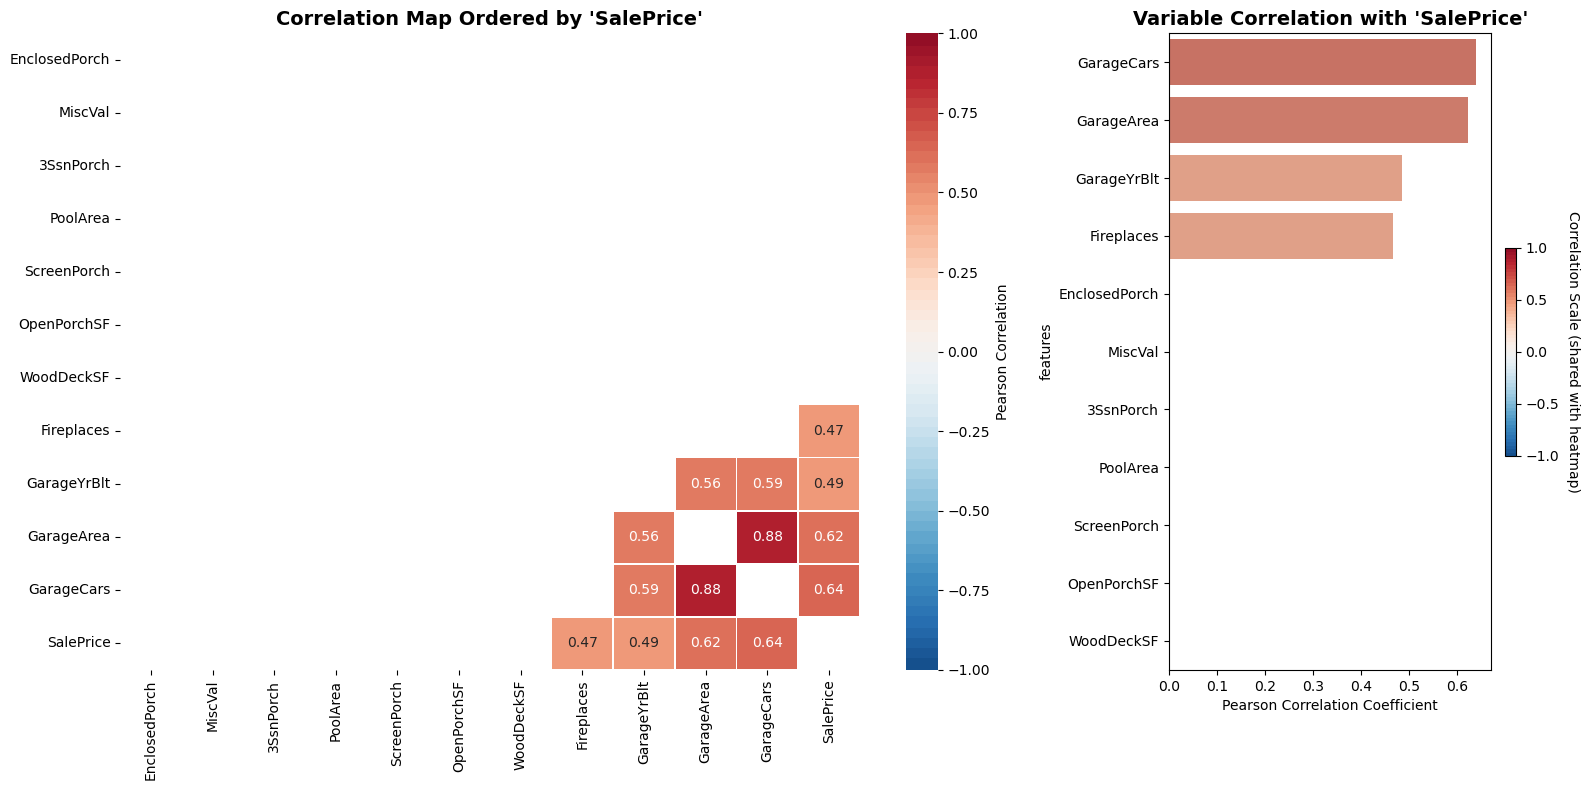

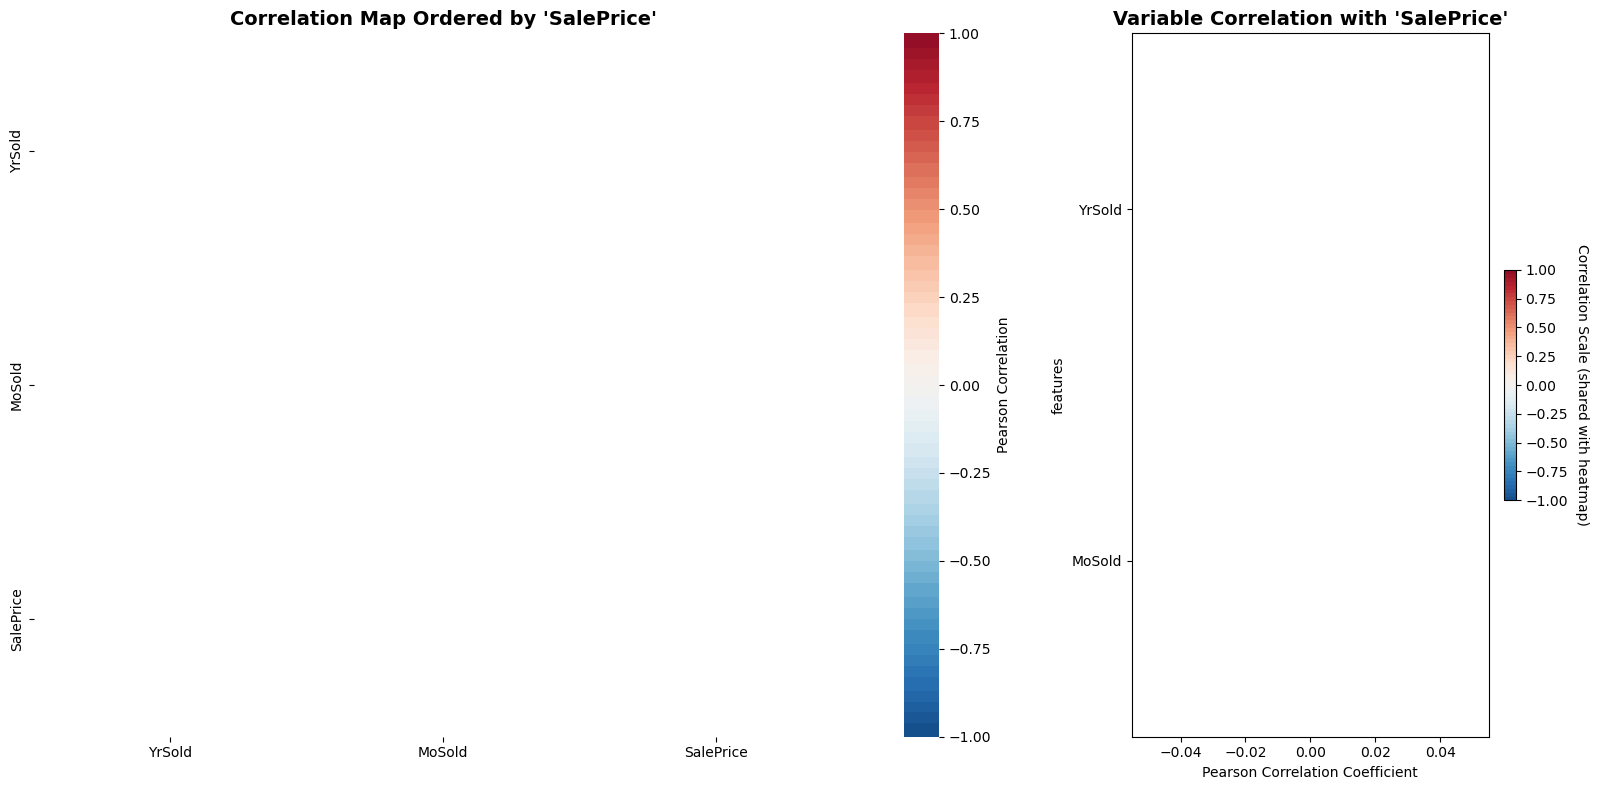

In [11]:
cols = FG["land"] + ["SalePrice"]
df1 = df[cols].copy()
a=correlation_bar(df1,target='SalePrice', threshold=0.35, plot_type='all')

cols = FG["structure"] + ["SalePrice"]
df1 = df[cols].copy()
b=correlation_bar(df1,target='SalePrice', threshold=0.35, plot_type='all')


cols = FG["area"] + ["SalePrice"]
df1 = df[cols].copy()
c=correlation_bar(df1,target='SalePrice', threshold=0.35, plot_type='all')

cols = FG["comfort"] + ["SalePrice"]
df1 = df[cols].copy()
d=correlation_bar(df1,target='SalePrice', threshold=0.35, plot_type='all')

cols = FG["sale_context"] + ["SalePrice"]
df1 = df[cols].copy()
e=correlation_bar(df1,target='SalePrice', threshold=0.35, plot_type='all')

In [8]:
# import plotly.graph_objects as go
# import scipy.stats as st
# import numpy as np

# # 1. Lista de colunas numéricas que você quer avaliar
# #features_to_plot = ['SalePrice', 'GarageArea', 'GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF']
# features_to_plot=df.select_dtypes(include=['number']).columns
# fig = go.Figure()

# # Cores da sua paleta
# color_hist = color_palette21[0]   # Verde Escuro
# color_johnson = color_palette21[18] # Laranja/Vermelho
# color_norm = color_palette21[10]  # Laranja Claro

#  buttons = []

# # 2. Loop para criar as curvas e o histograma de cada feature
# for i, col in enumerate(features_to_plot):
#     y = df[col].dropna()
    
#     # Cálculos
#     p_johnson = st.johnsonsu.fit(y)
#     p_norm = st.norm.fit(y)
#     x_range = np.linspace(y.min(), y.max(), 200)
#     pdf_j = st.johnsonsu.pdf(x_range, *p_johnson)
#     pdf_n = st.norm.pdf(x_range, *p_norm)
    
#     # Visibilidade inicial (apenas a primeira feature aparece ao carregar)
#     visible = (i == 0)
    
#     # Adicionar Histograma (índices: 3*i)
#     fig.add_trace(go.Histogram(
#         x=y, histnorm='probability density', name=f'Real: {col}',
#         marker_color=color_hist, opacity=0.6, visible=visible,
#         marker=dict(line=dict(width=1, color='white'))
#     ))
    
#     # Adicionar Johnson SU (índices: 3*i + 1)
#     fig.add_trace(go.Scatter(
#         x=x_range, y=pdf_j, mode='lines', name=f'Johnson SU: {col}',
#         line=dict(color=color_johnson, width=4), visible=visible
#     ))
    
#     # Adicionar Normal (índices: 3*i + 2)
#     fig.add_trace(go.Scatter(
#         x=x_range, y=pdf_n, mode='lines', name=f'Normal: {col}',
#         line=dict(color=color_norm, width=3, dash='dash'), visible=visible
#     ))
    
#     # Criar o botão para esta feature
#     # A lógica 'args' define quais traces (3 por feature) devem ser True (visíveis)
#     vis_mask = [False] * (len(features_to_plot) * 3)
#     vis_mask[i*3 : i*3 + 3] = [True, True, True]
    
#     button = dict(
#         label=col,
#         method="update",
#         args=[{"visible": vis_mask},
#               {"title": f"Análise de Distribuição: {col}",
#                "xaxis": {"title": col}}]
#     )
#     buttons.append(button)

# # 3. Configurar Layout com a Caixa de Seleção
# fig.update_layout(
#     updatemenus=[{
#         "buttons": buttons,
#         "direction": "down",
#         "showactive": True,
#         "x": 0.5, "xanchor": "right",
#         "y": 1.15, "yanchor": "top"
#     }],
#     title=f'Análise de Distribuição: {features_to_plot[0]}',
#     xaxis_title=features_to_plot[0],
#     yaxis_title='Densidade',
#     template='plotly_white',
#     width=1000,
#     height=720,
#     legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99)
# )

# fig.show()

### 2.2 Variaveis categóricas

```markdown
🔍 **Observação:** A variável `SalePrice` apresenta uma assimetria positiva . Isso pode ser tratado com transformação logarítmica na modelagem.
```
---
### 4. Correlação com SalePrice

```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 5. Gráficos por variável (exemplos)

```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 6-Outliers

```markdown
📌 **Nota:** 
```

## 💡  Insights Finais

🧠 **Principais descobertas da EDA:**

- `OverallQual`, `GrLivArea` e `GarageCars` têm forte correlação com o preço de venda.
- Variáveis como `Neighborhood`, `ExterQual` e `TotalBsmtSF` ajudam a explicar variações nos preços.
- A distribuição de `SalePrice` não é normal. Transformações podem ser úteis na modelagem.
- Outliers extremos foram detectados em `GrLivArea`, `TotalBsmtSF` e `GarageArea`. Devem ser tratados.


---

Próximos passos: limpeza de dados, transformação de variáveis e engenharia de features para modelagem.
